Este notebook foi executado pelo Google Colaboratory. Para executá-lo, clone o repositório para um diretório em seu Google Drive, conecte o notebook com o drive `drive.mount('/content/drive')` e localize o repositório já clonado `%cd /content/drive/.../PAC/cnn`.

# Localizando repositório

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd /content/drive/MyDrive/Github/PAC/cnn

/content/drive/MyDrive/Github/PAC/cnn


In [2]:
import data
import aimodel
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.color import label2rgb
plt.style.use('seaborn')

# Dados

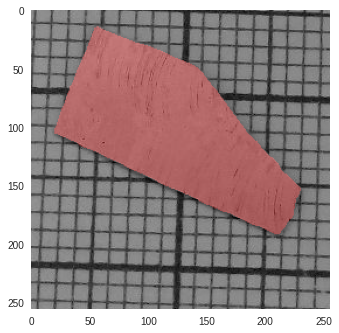

In [4]:
img, lbl = data.get_random()
plt.imshow(label2rgb(lbl, img, bg_label=0))
plt.grid(False)
plt.show()

# Iniciando treinamento

In [ ]:
unet = aimodel.UNet(name='U-Net', dataset=data.load_dataset(as_tensor=True, augmentation=True)).build((16, 32, 64))
unet.compile(optimizer=tf.keras.optimizers.Adam(1e-3, decay=1e-3/150), loss='binary_crossentropy', metrics=[aimodel.mape])

/content/drive/MyDrive/Github/PAC/cnn/aimodel.py:101: UserWarning: Nome alterado para U-Net0, pois uma U-Net com este nome já foi salva.
  if changed: warn(f'Nome alterado para {name}, pois uma U-Net com este nome já foi salva.')


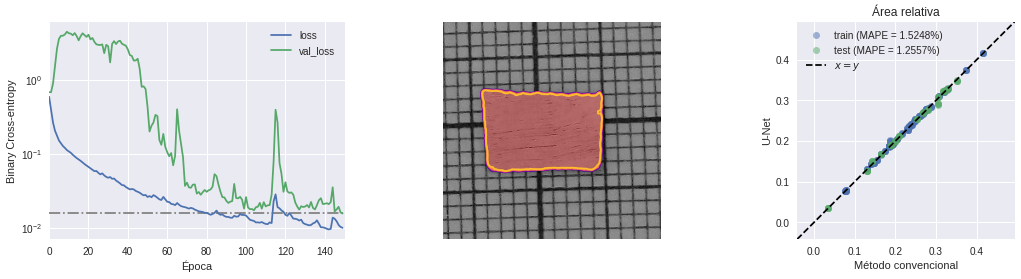

,epoch,loss,mape,val_loss,val_mape
127,127,0.012670,1.229728,0.017832,1.189656
149,149,0.010117,1.524775,0.015791,1.255749


In [ ]:
history = unet.fit(epochs=150, batch_size=len(unet.x_train)//6)

# Continuando treinamento

In [3]:
unet = aimodel.UNet(name='U-Net0', dataset=data.load_dataset(grayscale=True, as_tensor=True, augmentation=True)).load()
unet.compile(optimizer=tf.keras.optimizers.Adam(1e-3, decay=1e-3/150), loss='binary_crossentropy', metrics=[aimodel.mape])

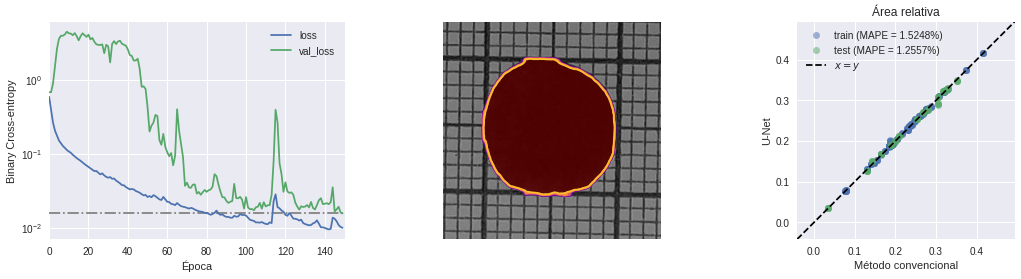

,epoch,loss,mape,val_loss,val_mape
127,127,0.012670,1.229728,0.017832,1.189656
149,149,0.010117,1.524775,0.015791,1.255749


In [6]:
unet.evaluate(unet.x_test, unet.y_test)
unet.plot()

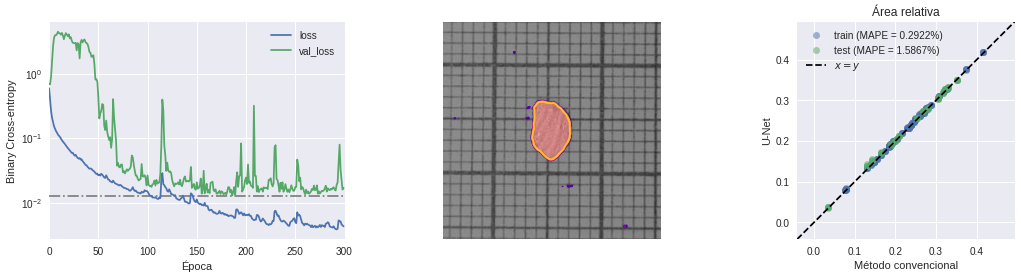

,epoch,loss,mape,val_loss,val_mape
186,185,0.006156,0.502477,0.012841,0.901597
264,263,0.004472,0.308908,0.013669,0.770126


In [4]:
history = unet.fit(epochs=150, batch_size=len(unet.x_train)//6)

# Análise

In [ ]:
info = data.get_info()
info['rel'] = info.label_pixel_area/256**2
pr = info[(info.rel < 0.21) & (info.rel > 0.15) & (~info.train)].sort_values('rel')
pr

,area,train,freq,slope,label_pixel_area,rel
24,65.467,False,0.074219,1.803607,12082.0,0.184357
16,56.566,False,0.066406,88.376754,12134.0,0.185150
48,122.232,False,0.101562,90.180361,12213.0,0.186356
1,20.623,False,0.039062,3.967936,12731.0,0.194260
50,127.880,False,0.097656,0.721443,12933.0,0.197342
20,59.763,False,0.066406,1.442886,13100.0,0.199890


In [ ]:
imgs = np.concatenate(data.get_by_area(*pr.area.values, label=False, as_tensor=True), axis=0)
imgs.shape

(6, 256, 256, 1)

1/1 [==============================] - 1s 927ms/step


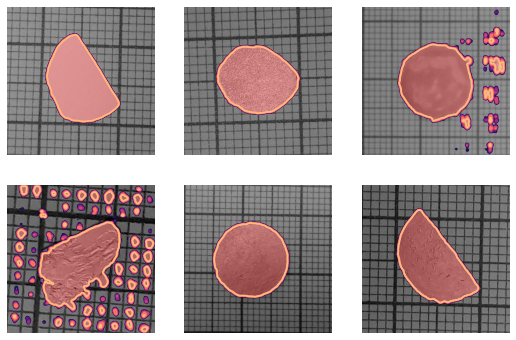

In [ ]:
ncols = 3
nrows = imgs.shape[0]//ncols
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))

for ax, img, pred in zip(axs.flat, imgs, unet.predict(imgs)):
    ax.imshow(label2rgb(pred[:, :, 0] > 0.5, img[:, :, 0], bg_label=0))
    ax.contour(pred[:, :, 0], cmap='magma')
    ax.axis('off')

plt.show()

In [ ]:
data.split_validation_data(0.26)

Foram encontradas 63 amostras, totalizando 126 arquivos. Dados para treinamento: 47 amostras (74.60%). Dados para validação: 16 amostras (25.40%).
